<a href="https://colab.research.google.com/github/STribedi-94/Deep-Learning-with-Artificial-Neural-Network/blob/main/Deep_Learning_with_Keras_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.shape

(768, 9)

In [5]:
df_diab.Outcome.unique()

array([1, 0])

In [6]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab['Outcome']

In [8]:
np.random.seed(12345)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# X-scaled = (X - mean)/sd -> z value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)

2.8.2


In [ ]:
#!pip install tensorflow

In [17]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = Sequential()

In [ ]:
X_train_scaled.shape[1]

8

In [ ]:
model.add(Input(shape = (X_train_scaled.shape[1],)))

In [ ]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [ ]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu
model.add(Dense(units=32, activation='relu'))

# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
1152+8256+2080+33

11521

In [ ]:
(8+1)*128

1152

In [ ]:
(128+1)*64

8256

In [ ]:
65*32

2080

In [ ]:
#(8+1)*128
#(128+1)*64
#(64+1)*32
#(32+1)*1

In [ ]:
1152+8256+2080+33

11521

In [ ]:
model.compile(optimizer='adam', 
              loss= 'binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.6094 - accuracy: 0.6612 - val_loss: 0.5523 - val_accuracy: 0.6883
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7443 - val_loss: 0.4879 - val_accuracy: 0.7792
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7769 - val_loss: 0.4575 - val_accuracy: 0.7597
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7801 - val_loss: 0.4439 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7850 - val_loss: 0.4420 - val_accuracy: 0.7727
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7899 - val_loss: 0.4407 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.7932 - val_loss: 0.4409 - val_accuracy: 0.7727
Epoch 8/100


In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
y_train_pred[0] >=0.5

array([ True])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[400,   0],
       [  0, 214]])

In [ ]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

1.0

In [ ]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[81, 19],
       [15, 39]])

In [ ]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.7792207792207793

In [ ]:
history = pd.DataFrame(result.history)

In [ ]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.609415,0.661238,0.552251,0.688312
1,0.518101,0.744300,0.487855,0.779221
2,0.478926,0.776873,0.457537,0.759740
3,0.458470,0.780130,0.443889,0.779221
4,0.446818,0.785016,0.442026,0.772727


In [ ]:
import matplotlib.pyplot as plt

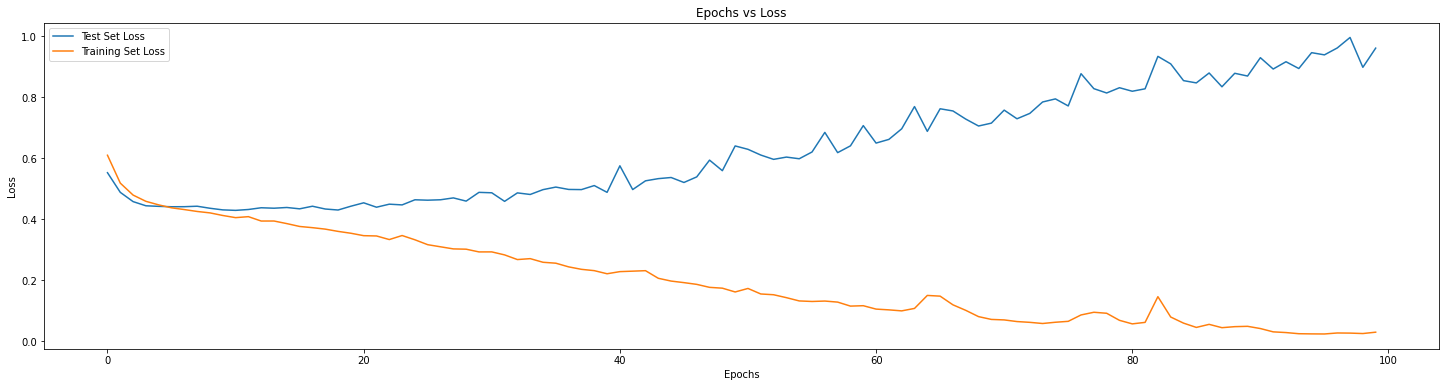

In [ ]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

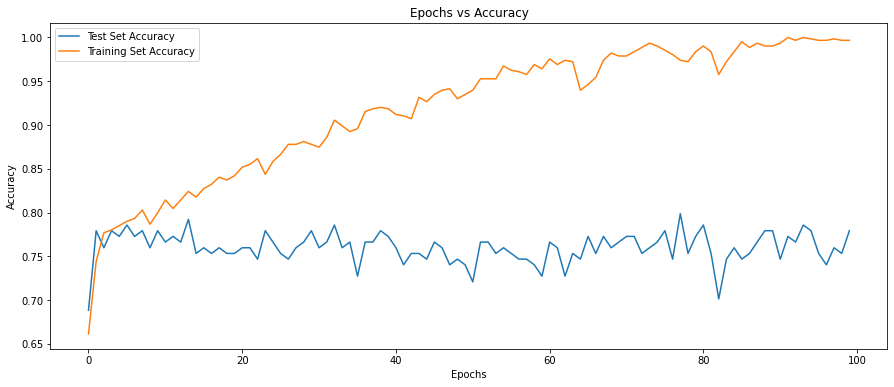

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()